<a href="https://colab.research.google.com/github/lifeisbeautifu1/deep-learning/blob/main/Building_Makemore_MLP_version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Building Makemore MLP version with Andrej Karpathy
https://www.youtube.com/watch?v=TCH_1BHY58I

In [37]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

### Let's download text file

In [38]:
import requests

from pathlib import Path
if Path("names.txt").is_file():
  print(f"names.txt already downloaded")
else:
  print("Downloading names.txt")
  request = requests.get("https://raw.githubusercontent.com/karpathy/makemore/master/names.txt")
  with open("names.txt", 'wb') as f:
    f.write(request.content)

names.txt already downloaded


In [39]:
words = open('names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [40]:
len(words)

32033

In [41]:
chars = sorted(list(set("".join(words))))
stoi = { s: i + 1 for i, s in enumerate(chars)}
stoi['.'] = 0
itos = { i: s for s, i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [85]:
block_size = 3
X, Y = [], []
for w in words:
  # print(w)
  context = [0] * block_size
  for ch in w + '.':
    ix = stoi[ch]
    X.append(context)
    Y.append(ix)
    # print("".join(itos[i] for i in context), "---->", itos[ix])
    context = context[1:] + [ix]
X = torch.tensor(X)
Y = torch.tensor(Y)

In [86]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([228146, 3]), torch.int64, torch.Size([228146]), torch.int64)

In [87]:
C = torch.randn((27, 2))

In [88]:
C.dtype

torch.float32

In [89]:
C

tensor([[ 0.5903,  0.7022],
        [-1.6282,  1.2331],
        [ 0.5907,  0.9525],
        [-0.5637,  0.0589],
        [-1.0304, -1.5272],
        [-1.3121,  0.0135],
        [-0.1645,  0.0661],
        [-0.1474, -0.0978],
        [ 0.6351, -0.7997],
        [-0.8621, -0.4242],
        [ 1.5108,  0.2485],
        [ 2.6972, -0.3346],
        [-1.0961, -0.2287],
        [ 0.4151,  0.0591],
        [-1.1366, -1.8923],
        [-1.1081, -0.9701],
        [ 0.9712,  0.3380],
        [ 1.2660,  0.4264],
        [-1.0915, -1.1348],
        [-0.2356, -0.3922],
        [-1.0608,  2.0450],
        [-0.8356,  0.4846],
        [-0.6024,  0.2727],
        [-0.3961,  0.2638],
        [ 0.0965,  0.3399],
        [ 0.6194,  0.4398],
        [ 0.1852, -0.4010]])

In [47]:
F.one_hot(torch.tensor(5), num_classes=27).float() @ C

tensor([-0.0791, -0.0648])

In [90]:
C[X]

tensor([[[ 0.5903,  0.7022],
         [ 0.5903,  0.7022],
         [ 0.5903,  0.7022]],

        [[ 0.5903,  0.7022],
         [ 0.5903,  0.7022],
         [-1.3121,  0.0135]],

        [[ 0.5903,  0.7022],
         [-1.3121,  0.0135],
         [ 0.4151,  0.0591]],

        ...,

        [[ 0.1852, -0.4010],
         [ 0.1852, -0.4010],
         [ 0.6194,  0.4398]],

        [[ 0.1852, -0.4010],
         [ 0.6194,  0.4398],
         [ 0.1852, -0.4010]],

        [[ 0.6194,  0.4398],
         [ 0.1852, -0.4010],
         [ 0.0965,  0.3399]]])

In [91]:
C[X].shape

torch.Size([228146, 3, 2])

In [92]:
X

tensor([[ 0,  0,  0],
        [ 0,  0,  5],
        [ 0,  5, 13],
        ...,
        [26, 26, 25],
        [26, 25, 26],
        [25, 26, 24]])

In [93]:
emb = C[X]
emb.shape

torch.Size([228146, 3, 2])

In [94]:
W1 = torch.randn((6, 100))
b1 = torch.randn(100)

In [17]:
torch.cat([emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]], 1).shape

torch.Size([228146, 6])

In [18]:
torch.cat(torch.unbind(emb, 1), 1).shape

torch.Size([228146, 6])

In [19]:
a = torch.arange(18)
a

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

In [20]:
a.shape

torch.Size([18])

In [21]:
a.view(2, 9)

tensor([[ 0,  1,  2,  3,  4,  5,  6,  7,  8],
        [ 9, 10, 11, 12, 13, 14, 15, 16, 17]])

In [22]:
a.view(3, 3, 2)

tensor([[[ 0,  1],
         [ 2,  3],
         [ 4,  5]],

        [[ 6,  7],
         [ 8,  9],
         [10, 11]],

        [[12, 13],
         [14, 15],
         [16, 17]]])

In [23]:
emb.view(32, 6)

RuntimeError: ignored

In [ ]:
emb.view(32, 6) @ W1 + b1

In [28]:
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)

In [29]:
h.shape

torch.Size([228146, 100])

In [30]:
W2 = torch.randn((100, 27))
b2 = torch.randn(27)

In [31]:
logits = h @ W2 + b2

In [32]:
logits.shape

torch.Size([228146, 27])

In [33]:
counts = logits.exp()

In [34]:
prob = counts / counts.sum(1, keepdims=True)

In [35]:
prob.shape

torch.Size([228146, 27])

In [36]:
loss = -prob[torch.arange(32), Y].log().mean()
loss

IndexError: ignored

In [95]:
X.shape, Y.shape

(torch.Size([228146, 3]), torch.Size([228146]))

In [96]:
g = torch.Generator().manual_seed(21474883647)
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [97]:
sum(p.nelement() for p in parameters)

3481

In [98]:
for p in parameters:
  p.requires_grad = True

In [71]:
for _ in range(10):
  # minibatch construct
  ix = torch.randint(0, X.shape[0], (32, ))
  # forward pass
  emb = C[X[ix]]
  h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
  logits =  h @ W2 + b2
  loss = F.cross_entropy(logits, Y)
  # print(loss.item())
  # counts = logits.exp()
  # prob = counts / counts.sum(1, keepdim=True)
  # loss = -prob[torch.arange(32), Y].log().mean()
  # loss
  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()
  for p in parameters:
    p.data += -0.1 * p.grad

print(loss.item())

16.357013702392578
13.312753677368164
13.042176246643066
10.629500389099121
9.760194778442383
9.190518379211426
9.858945846557617
8.448016166687012
8.717031478881836
6.977747440338135
6.977747440338135


In [72]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10 ** lre

In [99]:
lri = []
lossi = []

for i in range(1000):
  # minibatch construct
  ix = torch.randint(0, X.shape[0], (32, ))
  # forward pass
  emb = C[X[ix]]
  h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
  logits =  h @ W2 + b2
  loss = F.cross_entropy(logits, Y)
  # print(loss.item())
  # counts = logits.exp()
  # prob = counts / counts.sum(1, keepdim=True)
  # loss = -prob[torch.arange(32), Y].log().mean()
  # loss
  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  lr = lrs[i]
  for p in parameters:
    p.data += -lr * p.grad

  # lri.append(lr)
  lri.append(lre[i])
  lossi.append(loss.item())

ValueError: ignored

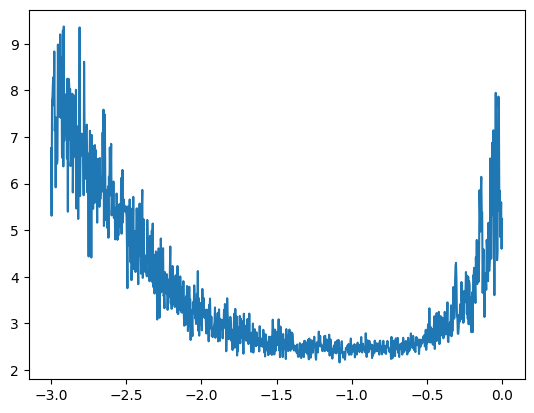

In [78]:
plt.plot(lri, lossi)

In [82]:
# lri = []
# lossi = []

for i in range(10000):
  # minibatch construct
  ix = torch.randint(0, X.shape[0], (32, ))
  # forward pass
  emb = C[X[ix]]
  h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
  logits =  h @ W2 + b2
  loss = F.cross_entropy(logits, Y)
  # print(loss.item())
  # counts = logits.exp()
  # prob = counts / counts.sum(1, keepdim=True)
  # loss = -prob[torch.arange(32), Y].log().mean()
  # loss
  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  lr = 0.1
  for p in parameters:
    p.data += -lr * p.grad

  # lri.append(lr)
  # lri.append(lre[i])
  # lossi.append(loss.item())

In [83]:
emb = C[X]
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Y)
loss

tensor(2.2948, grad_fn=<NllLossBackward0>)

In [84]:
len(words)

32033